<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/Topic_1/chapter1_diffraction_circular_aperture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Óptica - Tema 1 - Fraunhofer Diffraction: circular aperture**

---

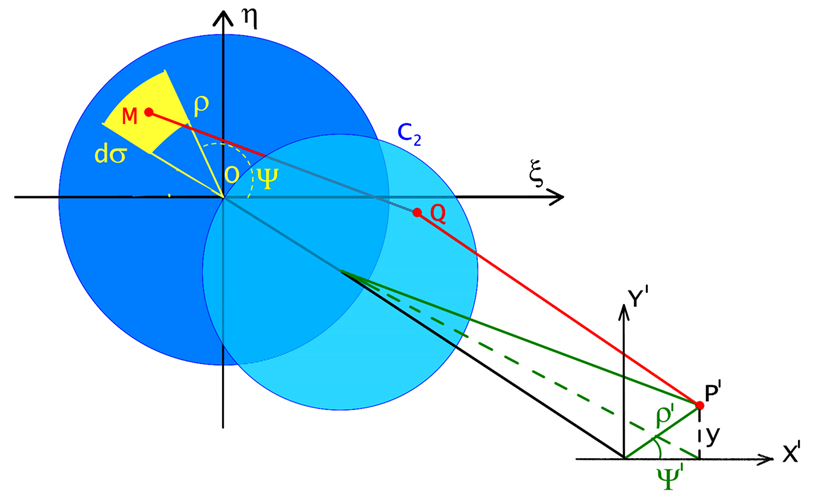

Ecuación general:
$$E_{cP'}=cte \int_\sigma e^{-\imath k [(\alpha_s-\alpha_p)\xi+(\beta_s-\beta_p)\eta]}d\sigma$$




Planteamiento del problema:

1. Fuente en el eje de simetría ($z$): $\alpha_s=\beta_s=0$
2. Diferencial en coordenadas cilíndricas:
$$d\sigma=\rho d\rho d\psi$$

3. Además:
$$\xi=\rho \cos(\psi)$$
$$\eta=\rho \sin(\psi)$$

4. Por simetría se puede tomar $\psi'=0 \rightarrow \beta_p=0$ (coordenadas en la pantalla)

5. $\alpha_p=\sin(\theta)$


Ecuación final difracción por abertura circular de radio $R$:
$$E_{cP'}=cte \int_0^R \rho d\rho \int_0^{2\pi}e^{\imath k \rho \sin(\theta)\cos(\psi)}d\psi$$




En la situación habitual donde el objeto difractor se encuentra entre dos lentes convergentes:
$$\sin(\theta)\approx \dfrac{\rho'}{f'}$$ donde $f'$ es la focal de la lente colectora y $\rho'$ la distancia al eje desde las coordenadas ${X'Y'}$, en el plano focal imagen de la lente colectora.

La integral resulta ser:
$$E_{cP'}=cte \int_0^R \rho d\rho \int_0^{2\pi}e^{\imath k \dfrac{\rho \rho'}{f'}\cos(\psi)}d\psi$$



Utilizando la definición de la función de Bessel de orden $0$:
$$J_0(u)=\dfrac{1}{2\pi}\int_0^{2\pi}e^{\imath u \cos(\psi)}d\psi$$

Tomando $u=k\dfrac{\rho \rho'}{f'}$

Resulta que:

$$E_{cP'}=cte \int_0^R \rho d\rho [2\pi J_0(k\dfrac{\rho \rho'}{f'})]$$

Utilizando la definición de la función de Bessel de orden $1$:
$$\dfrac{R}{a}J_1(aR)=\int_0^R J_0(a\rho)\rho d\rho$$

Encontramos que:

$$E_{cP'}=cte \times 2\pi\dfrac{J_1(aR)R}{a}$$

donde $a=k\dfrac{\rho'}{f'}$  




Es habitual definir $$Z=k\dfrac{\rho' R}{f'}=\dfrac{\pi}{\lambda}\dfrac{\rho' D}{f'}$$ donde $D=2R$

El resultado final, salvo constante de proporcionalidad ($\in \mathbb{C}$) es:

$$E_{cP'} =cte R^2 [\dfrac{2 J_1(Z)}{Z}]$$ y por lo tanto la intensidad será

$$I_{P'}=E_{cP'}  E^*_{cP'} =cte R^4(\dfrac{2 J_1(Z)}{Z})^2$$

*Note: $J_1(Z)/Z \rightarrow 1/2 \text{ for } Z \rightarrow 0$*

# Bessel functions (Bessel function of the first kind of real order and complex argument)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv,jn_zeros
 #https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html#scipy.special.jv
fig, ax = plt.subplots(dpi=150)
x = np.linspace(-15., 15., 1000)
for i in range(0,2):
    ax.plot(x, jv(i, x), label=f'$J_{i!r}$')
#ax.axvline(jn_zeros(1,1),color='green',linestyle='--') # Z1
ax.axvline(0,color='black',linestyle='--')
ax.axhline(0.0,color='black',linestyle='--')
plt.xlabel('$u$')
ax.legend()
plt.show()

# Fraunhofer diffraction (numerical)

For $l_s,l \gg \text{aperture dimensions} \Longrightarrow$
$$E_{cP}=\dfrac{\imath k A}{4\pi} \int_\sigma \dfrac{e^{-\imath k (r_p+r_s)}}{r_p r_s} \left( \cos(\theta)+\sin(\theta)\right ) d\sigma$$

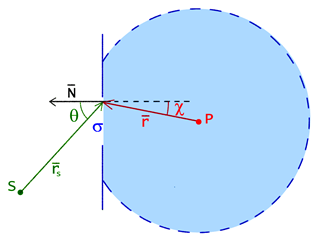

In [ ]:
import math
import numpy as np

def diff(theta, phi, k, rs, rp):
    coss = (np.cos(theta) + np.cos(phi)) / (rs * rp)
    E = coss * np.exp(-1j*k* (rp + rs))
    return E

def diffraction_intensity_circle_numerical(xs, ys, xp, yp, S, P, A, R,lambda_nm):
    k = 2.0 * math.pi / (lambda_nm*1e-9)
    dx = R/100 # cartesian mesh (X and Y directions)
    # Circle defined inside a square, sides (2R,2R)
    Nx = round(2 * R / dx)
    Ny = round(2 * R / dx)
    E = 0.0+0.0j
    for i in range(Nx):
        xa = R * (Nx - 2 * i) / Nx
        for j in range(Ny):
            ya = R * (Ny - 2 * j) / Ny
            if(xa**2+ya**2<=R**2):
              # Definition of the shape: points inside a circle
              rs = np.sqrt(S**2 + (xa - xs)**2 +(ya - ys)**2)
              rp = np.sqrt(P**2 + (xa - xp)**2 + (ya - yp)**2)
              # S=|zs| y P=|zp| cos(theta)=cos(N,-rs)=<N|-rs>/|rs| & cos(phi)=<N|rp>/|rp|
              theta = math.acos(S / rs)
              phi =   math.acos(P / rp)
              E+= diff(theta, phi, k, rs, rp)
    E = 1j*E * k * A * dx * dx / (4 * np.pi)
    return np.real(E*np.conjugate(E))

# Fraunhofer diffraction (analytic)

In [ ]:
def diffraction_intensity_circle_analytic(xp,yp,fp, R, lambda_nm):
  k = 2.0 * math.pi / (lambda_nm*1e-9)
  rho=np.sqrt(xp**2+yp**2)
  Z=k*rho*R/fp
  Ecp=(R**2)*2*jv(1,Z)/Z
  Ip=Ecp*np.conjugate(Ecp)
  return Ip

# Parameters (geometry)

Infrarrojo lejano con abertura rectangular
+ 𝑆 = 100.0 𝑚 (distancia al emisor)
+ $P \approx f'$ = 1.0 𝑚 (distancia a la pantalla)
+ $R$ = 1 𝑚𝑚 (anchura abertura horizontal)
+ λ= 600.0 n𝑚

In [ ]:
xs, ys = 0.0, 0.0  # meters
S, P = 20.0, 10.0 # meters
A = 1              # amplitude (arbitrary units)
R=1e-3             # meters
lambda_nm = 600.0  # nm
k = 2.0 * math.pi / (lambda_nm*1e-9)

# Diffraction pattern for $\varphi=0$ (both analytic and numerical)

In [ ]:
def calc_diff_pattern_phi0():
    Xp=100
    m=5
    xpm = m*1.22*P*lambda_nm*1e-9/(2.0*R)
    ypm = xpm
    diff_pattern = []
    for i in range(Xp):
      print("iteration",i,' of ',Xp)
      xp=xpm * (Xp - 2 * i) / Xp - xs +1e-5
      yp=1.0e-9
      I_numerical= diffraction_intensity_circle_numerical(xs, ys, xp, yp, S, P, A,R, lambda_nm)
      I_analytic=diffraction_intensity_circle_analytic(xp-xs, yp-ys, P, R, lambda_nm)
      diff_pattern.append([xp,I_analytic,I_numerical])
    return np.array(diff_pattern)

In [ ]:
diff_pattern=calc_diff_pattern_phi0()

## Plot static figure (both analytic and numerical)

In [ ]:
import matplotlib.pyplot as plt
#Z1=1.22*P*lambda_nm*1e-9/(2.0*R)
Z1=jn_zeros(1,1)*P*lambda_nm*1e-9/(2.0*np.pi*R)
print("Z0 bessel=",Z1)
x=diff_pattern[:,0]
y_analytic=diff_pattern[:,1]/np.max(diff_pattern[:,1]) # Normalized to 1
y_numerical=diff_pattern[:,2]/np.max(diff_pattern[:,2]) # Normalized to 1
#plt.plot(x,np.log(y_analytic),label='Analytic')
plt.plot(x,y_analytic,label='Analytic')
plt.axvline(Z1,color='green',linestyle='--')
plt.axvline(-Z1,color='green',linestyle='--')
plt.plot(x,y_numerical,label='Numerical',linestyle='--')

plt.xlabel(r'$\rho$ (m)')
plt.ylabel('Intensity (normalized to unity)')
plt.legend()
plt.show()

## Plot dynamic figure (analytic)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import SelectionSlider

def plot_function_with_sliders(f, labels, x_min, y_min,ref_x,max_y,value_scale):
    # Extract the parameter names from the function signature, excluding 'x'
    parameters = list(f.__code__.co_varnames)[1:f.__code__.co_argcount]

    # Create sliders for each parameter
    # Define the base, min exponent, and max exponent for the slider
    sliders = {}
    i=0
    for param in parameters:
        #print("parameter=",param)
        #print("[initial value, min, max, step]=",value_scale[i])
        sliders[param] = widgets.FloatSlider(value=value_scale[i][0],
                                             min=value_scale[i][1],
                                             max=value_scale[i][2],
                                             step=value_scale[i][3],
                                             description=param,
                                             readout_format='.3f')
        i+=1

    # Create sliders for x_max and y_max
    #print("r max")
    #print("[initial value, min, max, step]=",value_scale[i])
    x_max_slider = widgets.FloatSlider(value=value_scale[i][0],
                                       min=value_scale[i][1],
                                       max=value_scale[i][2],
                                       step=value_scale[i][3],
                                       description='radial scale',
                                       readout_format='.3f')
    #print("I max")
    #print("[initial value, min, max, step]=",value_scale[i+1])
    y_max_slider = widgets.FloatSlider(value=value_scale[i+1][0],
                                       min=value_scale[i+1][1],
                                       max=value_scale[i+1][2],
                                       step=value_scale[i+1][3],
                                       description='I scale',
                                       readout_format='.3f')

    # Define a function to update the plot
    def update_plot(**kwargs):
        plt.figure(figsize=(8, 6))
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

        x = np.linspace(x_min-x_max_slider.value, abs(x_min)+x_max_slider.value, 200)

        # Pass slider values as keyword arguments to the input function
        params = {param: slider.value for param, slider in sliders.items()}
        y = f(x, **params)

        plt.plot(x/ref_x, y/max_y)
        plt.scatter(x/ref_x, y/max_y,color='red')
        plt.title("Intensity normalized at $(x_p,y_p)=(0,0)$ value "+str(max_y)+'$m^2$')
        plt.grid(True)
        plt.xlim((x_min-x_max_slider.value)/ref_x, (abs(x_min)+x_max_slider.value)/ref_x)
        plt.ylim(y_min, y_max_slider.value)
        plt.show()

    # Create an interactive plot with the sliders
    interactive_plot = interactive(update_plot, **sliders, x_max=x_max_slider, y_max=y_max_slider)
    return interactive_plot

In [ ]:
# Example of an input function
function=diffraction_intensity_circle_analytic #analytic_rectangle(xp, yp, P, a,b, k)


# Define labels, axis limits, and initial parameter values
labels = [r'$\rho/R$', "Intensity (norm.)"]
m=5
Z1=jn_zeros(1,1)*P*lambda_nm*1e-9/(2.0*np.pi*R)
x_min = -m*Z1
y_min = 0.0
max_y = R**4
ref_x = R
# value_scale (each): [initial value, min,max,step]
value_scale=[[1e-9,-1e-2,1e-2,1e-3], # yp
             [P,0.1*P,10*P,0.1*P],   # P
             [R,0.1*R,10*R,0.1*R],   # R
             [lambda_nm,0.1*lambda_nm,3.0*lambda_nm,0.1*lambda_nm],      # lambda (wavelength) in nm
             [-R,0.1*R,10*R,0.05*R],    # x scale
             [1.0,0.01,50.0,0.05]]    # y scale

# Create the interactive plot
interactive_plot = plot_function_with_sliders(function,
                                              labels,
                                              x_min, y_min,
                                              ref_x,max_y,
                                              value_scale)

# Display the interactive plot
interactive_plot

# 2D diffraction pattern (analytic)

In [ ]:
def diff_pattern_2D():
    Xp=200
    Yp=200
    m=5
    xpm = m*1.22*P*lambda_nm*1e-9/(2.0*R)
    ypm = xpm

    diff_pattern = []
    for i in range(Xp):
      xp=xpm * (Xp - 2 * i) / Xp - xs +1e-5
      for j in range(Yp):
        yp=ypm * (Yp - 2 * j) / Yp - ys +1e-5
        I_analytic=diffraction_intensity_circle_analytic(xp, yp, P, R, lambda_nm)
        diff_pattern.append([xp,yp,I_analytic])
    return np.array(diff_pattern)

In [ ]:
diff_pattern_2D=diff_pattern_2D()
print(diff_pattern_2D.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (replace this with your numpy array)
data =diff_pattern_2D

# Extract x, y, and the value from the data
x = data[:, 0]
y = data[:, 1]
value = data[:, 2]/np.max(data[:, 2])

# Reshape the value to a 2D grid for contour plotting
x_unique = np.unique(x)
y_unique = np.unique(y)
X, Y = np.meshgrid(x_unique, y_unique)
Z = value.reshape(len(y_unique), len(x_unique))

# Create a contour plot
plt.figure(figsize=(6, 6))
max_value=np.max(Z)/100
contour = plt.contourf(X, Y, Z, levels=500, cmap='viridis',
                       vmax=max_value)
plt.colorbar(contour)  # Use scientific notation for colorbar


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Intensity (normalized to unity)')
plt.gca().set_aspect('equal')  # Set equal aspect ratio
plt.show()
